In [1]:
%config IPCompleter.greedy=True
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
import numpy as np
import keras
from keras import layers
from keras import models
from keras.models import  load_model,Sequential
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import sys
import pickle
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import h5py
import os

from datetime import datetime
import logging

Using TensorFlow backend.


In [2]:
formatter = logging.Formatter('%(asctime)s :: %(name)s :: %(funcName)s :: %(lineno)d - %(message)s', datefmt='%d-%b-%y %H:%M:%s')
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler('CPU_train_350.log')
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [3]:
start_time = datetime.now()

In [4]:
test_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Test_Data")
print(test_path)
val_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Val_Data")
train_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Train_Data")

/home/dv-lab/Documents/SAMPLES/350/Test_Data


In [5]:
logger.info('process using CPU')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(str(train_path), 
                                                 target_size = (20, 20),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(str(test_path), 
                                            target_size = (20, 20),
                                            batch_size = 8,
                                            class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(str(val_path),
                                            target_size = (20, 20),
                                            batch_size=8,
                                            class_mode='categorical')
logger.info('training data set loaded from {}'.format(str(train_path)))
logger.info('test data set available in {}'.format(str(test_path)))
logger.info('Validation data set loaded from {}'.format(str(val_path)))

I0916 01:36:44.731252 139817752479552 <ipython-input-5-d6c8f07a87fc>:1] process using CPU


Found 3500 images belonging to 10 classes.
Found 140 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


I0916 01:36:45.167245 139817752479552 <ipython-input-5-d6c8f07a87fc>:22] training data set loaded from /home/dv-lab/Documents/SAMPLES/350/Train_Data
I0916 01:36:45.168709 139817752479552 <ipython-input-5-d6c8f07a87fc>:23] test data set available in /home/dv-lab/Documents/SAMPLES/350/Test_Data
I0916 01:36:45.169980 139817752479552 <ipython-input-5-d6c8f07a87fc>:24] Validation data set loaded from /home/dv-lab/Documents/SAMPLES/350/Val_Data


In [6]:
classifier = Sequential()
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(20,20,3), activation='tanh', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='tanh', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation='tanh'))

model.add(layers.Dense(10, activation='tanh'))

model.summary()

W0916 01:36:45.183045 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 01:36:45.202167 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 01:36:45.205721 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 01:36:45.223743 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 6)         456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 6)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

W0916 01:36:45.303255 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0916 01:36:45.328614 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
#https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps
history = model.fit_generator(generator=training_set,
                    steps_per_epoch=100,          
                    validation_data=test_set,
                    validation_steps=20,
                    epochs=50
)

W0916 01:36:45.439838 139817752479552 deprecation.py:323] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0916 01:36:45.498882 139817752479552 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/keras_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
100/100 [==============================] - 54s 542ms/step - loss: 7.9638 - acc: 0.1087 - val_loss: 8.6790 - val_acc: 0.0962
Epoch 2/50
100/100 [==============================] - 49s 487ms/step - loss: 7.6561 - acc: 0.1025 - val_loss: 9.2989 - val_acc: 0.1026
Epoch 3/50
100/100 [==============================] - 49s 488ms/step - loss: 7.7367 - acc: 0.0887 - val_loss: 8.2657 - val_acc: 0.1026
Epoch 4/50
100/100 [==============================] - 48s 478ms/step - loss: 7.5755 - acc: 0.1100 - val_loss: 9.0923 - val_acc: 0.0962
Epoch 5/50
100/100 [==============================] - 48s 480ms/step - loss: 7.6160 - acc: 0.0975 - val_loss: 8.9889 - val_acc: 0.1282
Epoch 6/50
100/100 [==============================] - 49s 486ms/step - loss: 7.5151 - acc: 0.0962 - val_loss: 8.0590 - val_acc: 0.0769
Epoch 7/50
100/100 [==============================] - 49s 490ms/step - loss: 7.7971 - acc: 0.1188 - val_loss: 8.7823 - val_acc: 0.0769
Epoch 8/50
100/100 [==============================] - 5

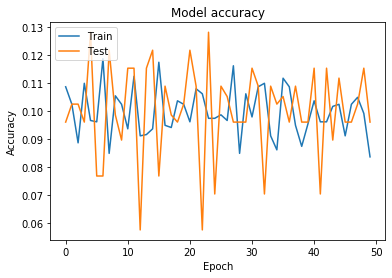

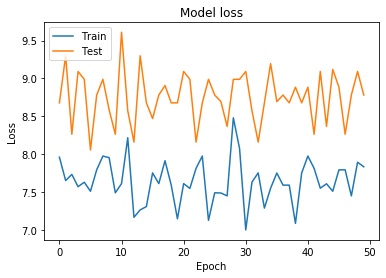

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
# get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (5, 5, 3, 6)
conv2d_2 (5, 5, 6, 16)


In [11]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

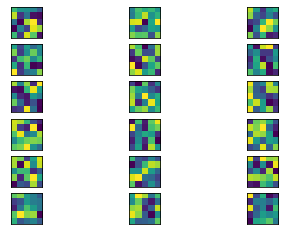

In [12]:
from matplotlib import *
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j])
        ix += 1
# show the figure
pyplot.show()

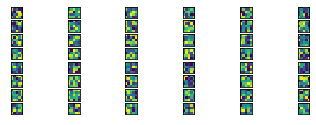

In [13]:
n_filters, ix = 16, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 6, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j])
        ix += 1
# show the figure
pyplot.show()

In [14]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 20, 20, 3),
    'dtype': 'float32',
    'filters': 6,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'AveragePooling2D',
   'config': {'name': 'average_pooling2d_1',
    'trainable': True,
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  

In [15]:
model.get_layer(name="dense_1").input_shape

(None, 64)

In [16]:
model.get_layer(name="dense_2").input_shape

(None, 120)

In [17]:
model.get_layer(name="dense_3").input_shape

(None, 84)

In [18]:
print(model.get_layer(name="dense_3").get_weights()[0].flatten)

<built-in method flatten of numpy.ndarray object at 0x7f2994734e40>


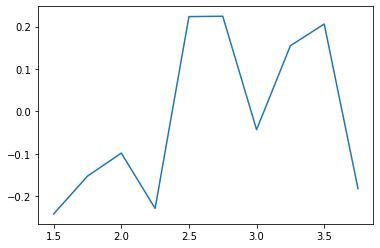

In [19]:
t=np.linspace(1.5, 3.75, 10)
w=model.get_layer(name="dense_3").get_weights()[0][0].flatten()
plt.plot(t,w)

In [20]:
end_time = datetime.now()
logger.info('program execution ended at {}'. format(end_time))
logger.info('Total run time {}'. format(end_time-start_time))
logger.info('Program ended \n---------------------------------------------------------------------------------------------------------------------------------------')

I0916 02:15:19.414130 139817752479552 <ipython-input-20-6967a99a90e4>:2] program execution ended at 2019-09-16 02:15:19.414063
I0916 02:15:19.415162 139817752479552 <ipython-input-20-6967a99a90e4>:3] Total run time 0:38:34.858517
I0916 02:15:19.416381 139817752479552 <ipython-input-20-6967a99a90e4>:4] Program ended 
---------------------------------------------------------------------------------------------------------------------------------------
